# 无人驾驶工程师纳米学位

## 深度学习

## 项目：搭建一个交通标志分类器

在这个 notebook 中，我们提供了一个模板来帮助你完成不同阶段的功能，你需要完成所用的功能才能通过该项目。如果你引用了外部 python 代码，比如写好的 tensorflow 帮助函数，请在提交的时候一并附上。

> **注意：** 完成 notebook 以后，你需要将notebook 导出 html 文件，然后和报告一起提交审阅。在导出 html 之前，你需要完整无错误地运行所有的代码块以便审阅。导出的方法如下：
> "**File -> Download as -> HTML (.html)** 

除了完成代码以外，你还需要写一篇 pdf 或 markdown 格式的报告。可以按照这个[模板](writeup_template.md)来写。代码和报告需要满足每一条[评审标准](https://review.udacity.com/#!/rubrics/481/view)才能通过该项目。

[评审标准](https://review.udacity.com/#!/rubrics/481/view)介绍了如何写出一份脱颖而出的报告（可选），以及通过项目的最低要求。如果你想写一份脱颖而出的报告，你可以在这个 notebook 后面继续写你的代码，同时在报告中介绍你是如何实现这些功能的。

>**注意：** 代码和 markdown 文档都可以通过 **Shift + Enter** 执行，markdown 文档可以通过双击进入编辑模式进行编辑。

---
## 步骤0：导入数据集

In [24]:
# 导入 pickle 库
import pickle

# TODO: 在下面填写你下载的训练集、验证集和测试集的地址

training_file = "data/train.p"
validation_file="data/valid.p"
testing_file = "data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## 步骤1：数据集探索

这些 pickle 文件实际上是一个字典，它有四个 key 和对应的值：

- `'features'` 是一个四维数组，交通标志的图片数据 (样本数, 高度, 宽度, 颜色通道) (num examples, width, height, channels)。
- `'labels'` 是一个一维数组，对应图片的分类 id，`signnames.csv`是 id 到分类名称的映射。
- `'sizes'` 是一个元组数组，它包含每个图片对应的原始尺寸 (width, height)。
- `'coords'` 是一个元组数组，它包含每个交通标志在原图上的方框的位置信息，也就是左上角坐标和右下角坐标 (x1, y1, x2, y2)。 **这些坐标只与原图有关，features 是已经裁好的 (32, 32) 的交通标志图片。**

完成下面的数据集统计代码，请使用 Python、NumPy 或 Pandas 来计算这些数据，不要直接进行硬编码。比如 [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) 可以很方便地计算这些数据。

### 使用 Python、NumPy 或 Pandas 计算数据集的基本属性

In [11]:
### 将每个问号改为计算代码

# TODO: 训练集的样本数
n_train = len(X_train)

# TODO: 验证集的样本数
n_validation = len(X_valid)

# TODO: 测试集的样本数
n_test = len(X_test)

# TODO: 交通标志的图片尺寸
image_shape = X_train[0].shape

# TODO: 数据集的类别数量
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### 数据集探索可视化

可视化德国交通标志数据集（German Traffic Signs Dataset）。

这个步骤是开放式的，你可以进行类似下面几种可视化：

* 可视化数据集的几个样本
* 可视化每种交通标志的样本数

下面有一些资源链接可以参考：

* [Matplotlib](http://matplotlib.org/)
* [Matplotlib examples](http://matplotlib.org/examples/index.html)
* [Matplotlib gallery](http://matplotlib.org/gallery.html)
* [seaborn](https://seaborn.pydata.org/)
* [seaborn gallery](https://seaborn.pydata.org/examples/index.html)

建议你先从简单的东西，第一。如果你想做更多的事情，在完成其他部分之后再来做。查看培训、验证和测试集中的类分布是很有意思的。分布是一样的吗？有比别人更多的一些类的例子吗？

**注意:** 你可以先进行一些简单的可视化。如果你想进行更多可视化，可以在完成这部分代码以后再继续做。分析训练集、验证集和测试集的类分布是很有意义的，你可以进行更多的可视化，比如类分布是否一致，有没有某个类的样本比较多。

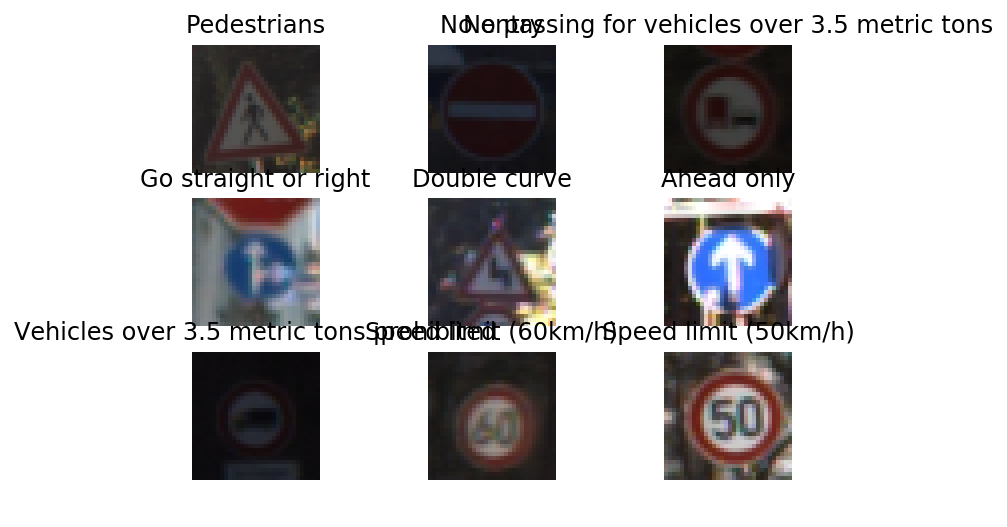

In [12]:
### 数据集探索可视化
### 如果觉得不够，你可以自由添加代码块
import matplotlib.pyplot as plt
# 添加下面这句代码，可以让可视化图片直接显示在 notebook 里。
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# TODO: 对数据集进行探索可视化
import pandas as pd
import random
signnames = pd.read_csv('signnames.csv')

for i in range(9):
    index=random.randint(0,len(X_train))
    plt.subplot(3,3,i+1)
    signname=signnames["SignName"][y_train[index]]
    plt.title(signname)
    plt.imshow(X_train[index])
    plt.axis('off')

----

## 步骤2：设计和测试模型

设计一个深度学习模型，并且训练它识别交通标志（[German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset)）。

如果你不知道如何开始，可以去看看 CNN 课程结束时的 [LeNet-5](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) 的代码实现。你可能需要改一下类别数量才能够正常使用 LeNet-5。

使用 LeNet-5 的话，在验证集上应该能达到0.89 左右的准确率。通过本项目的最低要求是在验证集上达到 0.93 以上的准确率。

在这个项目中，你需要注意以下几个问题：

* 神经网络的结构（是否有欠拟合或过拟合的问题？）
* 数据集预处理方法（比如标准化，归一化，转为灰度图等方法）
* 每个类别的样本数（不平衡可能会导致模型有偏见）
* 进行数据增强（比如旋转，裁剪，镜像等）

这里有一个[公开发表的基准模型](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf)作为参考。不需要熟悉论文中使用的方法，但尝试阅读类似的论文是非常有帮助的。

### 数据集预处理（比如标准化，归一化，转为灰度图等方法）

至少应该对图像数据进行标准化操作，也就是使数据的平均值为0，方差为1。不过对于图像数据来说，`(pixel-128)/128` 是一种更方便的近似算法，我们可以在本项目中使用该算法。

其他的预处理步骤是可选的，你可以尝试不同的预处理方法，看是否能够提高模型的性能。

In [26]:
### 在这里写预处理的代码。要求对数据进行标准化/归一化操作，
### 当然你也可以进行其他预处理操作，比如转为灰度等。
### 你可以自由添加代码块
# TODO: 对数据集进行预处理
import numpy as np

def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

def data_process(data):
    # this process include image normalization amd grayscale
    # data's shape is (num_image, 32, 32, 3)
    new_data=[]
    for img in data:
        gray_img = rgb2gray(img)
        norm_img=(gray_img-128)/128
        new_data.append(norm_img)
    return np.array(new_data).reshape((len(new_data), 32, 32, 1))

X_train=data_process(X_train)
X_valid=data_process(X_valid)
X_test=data_process(X_test)

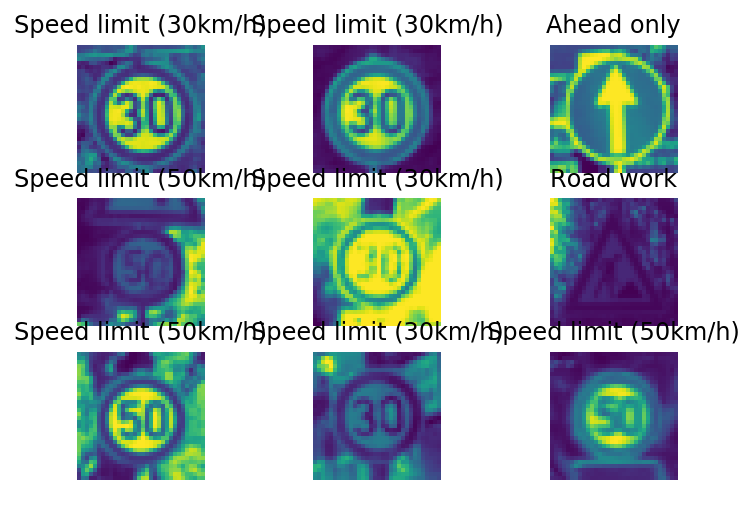

In [14]:
for i in range(9):
    index=random.randint(0,len(X_valid))
    plt.subplot(3,3,i+1)
    signname=signnames["SignName"][y_valid[index]]
    plt.title(signname)
    plt.imshow(X_valid[index][:,:,0])
    plt.axis('off')

In [15]:
from keras.utils import to_categorical
y_train=to_categorical(y_train)
y_valid=to_categorical(y_valid)
y_test=to_categorical(y_test)

### 模型结构

In [16]:
### 在这里定义模型结构。
### 你可以自由添加代码块
# TODO: 定义模型结构
import numpy as np
from keras.models import Model
from keras.layers import Input, Flatten, Dropout, Dense
from keras.layers import Conv2D, MaxPooling2D

inputs = Input(shape=(32,32,1))
x=Conv2D(64, (3, 3), activation="relu", padding="same")(inputs)
x=Conv2D(64, (3, 3), activation="relu", padding="same")(x)
x=MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)
x=Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x=Conv2D(128, (3, 3), activation="relu", padding="same")(x)
x=MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)
x=Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x=Conv2D(256, (3, 3), activation="relu", padding="same")(x)
x=MaxPooling2D((2, 2), strides=(2, 2), padding="same")(x)
x=Flatten()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x)
x=Dropout(0.7)(x)
outputs=Dense(43, activation='softmax')(x)

model = Model(inputs=inputs,outputs=outputs)

### 训练、验证和测试模型

可以使用验证集来评估模型的表现。训练集和验证集的准确率都很低意味着欠拟合。在训练集上准确率很高，但验证集上的准确率低，意味着过拟合。

In [18]:
### 在这里训练你的模型。
### 计算并输出训练集和验证集的准确率。
### 调好了模型结构以后，测试集的准确率也需要计算并输出。
### 你可以自由添加代码块
# TODO: 训练、验证和测试模型
from keras.callbacks import TensorBoard

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(X_train,y_train,validation_data=(X_valid,y_valid), batch_size=32, epochs=3, callbacks=[TensorBoard(log_dir='./log')])
model.save('model.h5')

Train on 34799 samples, validate on 4410 samples
Epoch 1/3
34799/34799 [==============================] - 36s 1ms/step - loss: 1.8132 - acc: 0.4912 - val_loss: 0.3652 - val_acc: 0.8887
Epoch 2/3
34799/34799 [==============================] - 36s 1ms/step - loss: 0.1357 - acc: 0.9613 - val_loss: 0.2315 - val_acc: 0.9420
Epoch 3/3
34799/34799 [==============================] - 36s 1ms/step - loss: 0.0820 - acc: 0.9783 - val_loss: 0.3197 - val_acc: 0.9211


In [19]:
model.evaluate(X_test, y_test)

12630/12630 [==============================] - 3s 228us/step


[0.30716687569458123, 0.9323040380236277]

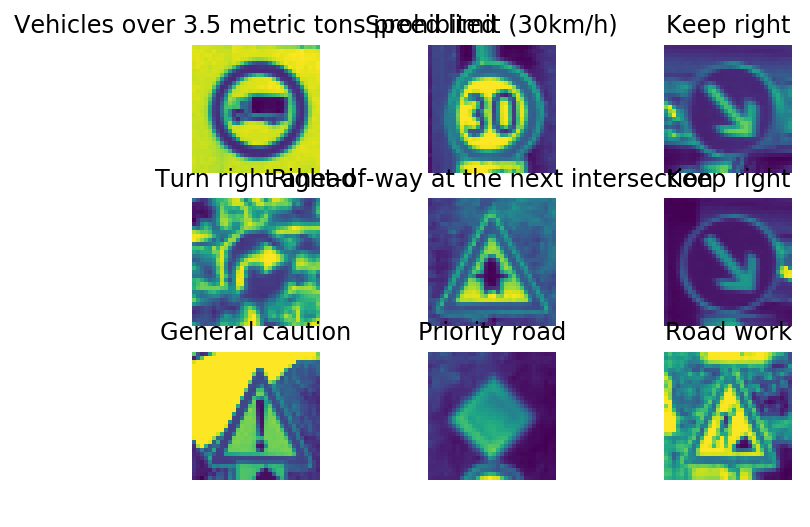

In [28]:
pred=model.predict(X_test[0:10])

for i in range(9):
    plt.subplot(3,3,i+1)
    signname=signnames["SignName"][np.argmax(pred[i])]
    plt.title(signname)
    plt.imshow(X_test[i][:,:,0])
    plt.axis('off')

---

## 步骤3：在新图片上测试模型

为了使你更了解模型的工作原理，请从网站下载至少五张德国交通标志图片，并使用你训练好的模型来预测交通标志类型。

你可以使用 `signnames.csv` 把类别 id 解码为实际的类别名称。

### 读取并可视化图像

In [ ]:
### 读取图像并对图像进行可视化
### 你可以自由添加代码块
# TODO: 读取并可视化图像

### 预测每张图片的交通标志类别

In [ ]:
### 使用模型对每张图片进行预测并输出预测结果。
### 确保你对每张图片进行了与上面一样的预处理步骤。
### 你可以自由添加代码块
# TODO: 预测每张图片的类别

### 分析模型性能

In [ ]:
### 计算五张图片的准确率。
### 举个例子，模型在五张图片中预测对了一张图片，那么模型的准确率是20%。

### 输出概率最大的前5个softmax 概率

对每张图来说，我们可以 print 模型输出的 Softmax 概率来显示模型对预测的**确定程度**（每张图限制在最大的前5个概率）。[`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k)函数可以帮助实现这个功能。

下面就给了一个例子来展示 `tf.nn.top_k` 函数可以寻找每张图的前 k 个预测结果。

`tf.nn.top_k` 会返回前 k 个预测的概率和 id。举个例子，当 k=3 时，对每个交通标志来说，它都会返回前三个最大的概率和对应的类别 id。

以这个numpy数组为例，数组中的值表示预测的结果，它包含五个图像的具有六个可能的类的 softmax 概率。`tf.nn.top_k`用于选择最高概率的三个类：

```py
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

运行 `sess.run(tf.nn.top_k(tf.constant(a), k=3))` 会得到下面的结果:

```py
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

看第一行我们可以得到 `[ 0.34763842,  0.24879643,  0.12789202]`，这里的三个数就是第一张图的前三个最大的概率，`[3, 0, 5]` 就是这三个概率对应的分类 id。

In [ ]:
### 打印出在网络上找到的德国交通标志图像的预测的前五个最大的概率。
### 你可以自由添加代码块
# TODO: 输出前五个最大的概率

### 项目报告

完成了上面的代码以后，按照这个[模板](writeup_template.md)完成你的项目报告。报告可以是 pdf 或 markdown 格式。

> **注意：** 完成 notebook 以后，你需要将notebook 导出 html 文件，然后和报告一起提交审阅。在导出 html 之前，你需要完整无错误地运行所有的代码块以便审阅。导出的方法如下：
> "**File -> Download as -> HTML (.html)** 

---

## 步骤4（可选）： 通过测试图像可视化神经网络的状态

这个部分不需要完成，仅作为一个理解神经网络权值输出的额外练习。虽然神经网络是一个很好的自主学习算法，但是它们黑盒化的学习过程让人很难理解，所以我们可以通过绘制它们的特征图来进一步理解神经网络的权值的含义。

在成功训练完神经网络之后，你可以向神经网络输入一张测试图片，然后绘制出神经网络某一层的输出，观察卷积层对测试图像的响应，即特征图。 我们可以从这些绘制的特征图中看到神经网络感兴趣的部分。对于一张交通标志图来说，可能神经网络对交通标志的外边缘输出很高的激活值，也有可能会对交通标志内部的图案感兴趣。

下面提供了一个函数，它可以可视化任意 tensorflow 层的输出。函数的的输出（image_input）是一张图片，可以是训练集的图片，也可以是其他从网上找到的图片，然后 tf_activation 是模型的某个层，比如你想可视化 [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) 里面的第二层卷积层的输出，你应该设置 `tf_activation=conv2`。

如果想知道特征图大致图样，你可以前往 NVIDIA 网站查看他们的论文 [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) 中的 Visualization of internal CNN State 章节。NVIDIA 证明了他们的网络能够识别道路边界，他们对比了两张图，一张有清晰的道路，而另一张没有，有道路的图对应的激活图能够清晰地显示出道路边界，而没有道路的图片对应的激活图则充满噪声，无法识别出有用的东西。

![](feature-maps-road.png)

<p style="text-align: center;">上图表明卷积层识别了道路边界</p>

![](feature-maps-woods.png)

<p style="text-align: center;">上图可以看出卷积层无法识别出有用的东西</p>

尝试去实现类似的可视化，展示你训练的模型识别到的有趣的特征，比如我们可以可视化有交通标志的图片和没有交通标志的图片的激活图，然后观察它们的激活图有什么不同，或者甚至可以去观察训练过的模型和没有经过训练的模型，它们对同一张图片的反应有什么不同。

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;">函数的输出类似上图</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### 在这里可视化你的网络的特征图。
### 你可以自由添加代码块

# image_input: 送入网络的测试图片
# tf_activation: tf Variable 对象，你希望可视化的某一层
# activation_min/max: 调整它们你可以更细致地观察激活图，默认情况下 matplot 将 min 和 max 设置为输出的实际最小和最大值
# plt_num: 用于在同一个代码块里进行多次可视化，只需要设置不同的编号即可

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # 请确保你的 image_input 预处理方式和神经网络训练的时候一致，比如尺寸、归一化等
    # 注意: x 的名称应该与你的神经网络的占位符变量名相同 (tensorflow data placeholder variable)
    # 如果遇到了 tf_activation is not defined 错误，这可能是在函数内读取或操作变量的时候出了问题
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # 设置特征图的位置
        plt.title('FeatureMap ' + str(featuremap)) # 显示特征图的编号
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")